In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Content:

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

###    school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

###    sex - student's sex (binary: 'F' - female or 'M' - male)

###    age - student's age (numeric: from 15 to 22)

###    address - student's home address type (binary: 'U' - urban or 'R' - rural)

###    famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

###    Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

###    Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

###    Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

###    Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

###    Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

###    reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

###    guardian - student's guardian (nominal: 'mother', 'father' or 'other')

###    traveltime - home to school travel time (numeric: 1 - 1 hour)

###    studytime - weekly study time (numeric: 1 - 10 hours)

###    failures - number of past class failures (numeric: n if 1<=n<3, else 4)

###    schoolsup - extra educational support (binary: yes or no)

###    famsup - family educational support (binary: yes or no)

###    paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

###    activities - extra-curricular activities (binary: yes or no)

###    nursery - attended nursery school (binary: yes or no)

###    higher - wants to take higher education (binary: yes or no)

###    internet - Internet access at home (binary: yes or no)

###    romantic - with a romantic relationship (binary: yes or no)

###    famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

###    freetime - free time after school (numeric: from 1 - very low to 5 - very high)

###    goout - going out with friends (numeric: from 1 - very low to 5 - very high)

###    Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

###    Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

###    health - current health status (numeric: from 1 - very bad to 5 - very good)

###    absences - number of school absences (numeric: from 0 to 93)

## These grades are related with the course subject, Math or Portuguese:

###    G1 - first period grade (numeric: from 0 to 20)
###    G2 - second period grade (numeric: from 0 to 20)
###    G3 - final grade (numeric: from 0 to 20, output target)


In [2]:
df = pd.read_csv('student-por.csv')

<AxesSubplot:ylabel='school'>

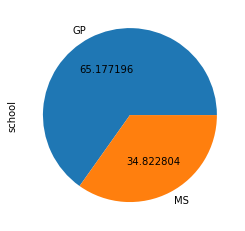

In [3]:
df['school'].value_counts().plot(kind='pie', autopct='%f')

In [4]:
df.drop(['school', 'nursery'], axis=1, inplace=True)

<AxesSubplot:>

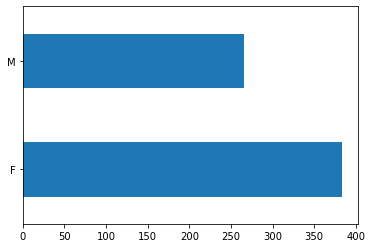

In [5]:
df['sex'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='age', ylabel='count'>

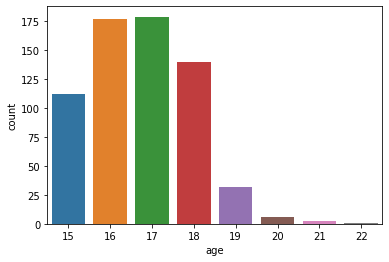

In [6]:
sns.countplot(df['age'])

<AxesSubplot:ylabel='sex,age'>

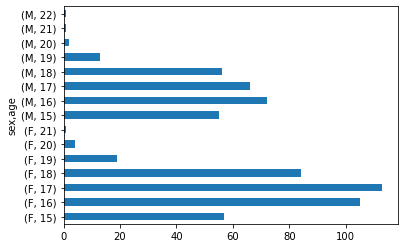

In [7]:
df.groupby(['sex', 'age']).size().plot(kind='barh')

<AxesSubplot:ylabel='address'>

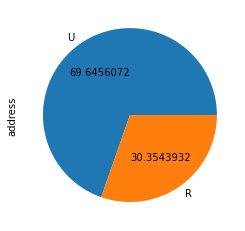

In [8]:
df['address'].value_counts().plot(kind='pie', autopct='%f2')

<AxesSubplot:ylabel='sex,address'>

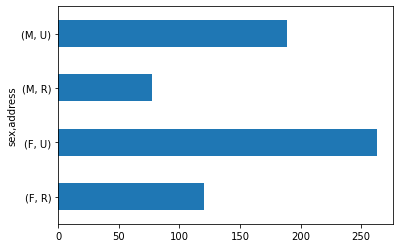

In [9]:
df.groupby(['sex', 'address']).size().plot(kind='barh')

In [10]:
df['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

In [11]:
df['Pstatus'].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

<AxesSubplot:ylabel='Pstatus,famsize'>

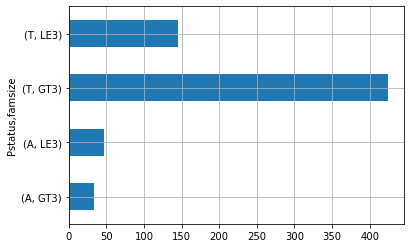

In [12]:
df.groupby(['Pstatus', 'famsize']).size().plot(kind='barh', grid=True)

In [13]:
print("""
      0:none, 
      1:primary education (4th grade),
      2:5th to 9th grade,
      3:secondary education,
      4:higher education)
""")
print('mother')
print(df['Medu'].value_counts())
print('father:')
print(df['Fedu'].value_counts())


      0:none, 
      1:primary education (4th grade),
      2:5th to 9th grade,
      3:secondary education,
      4:higher education)

mother
2    186
4    175
1    143
3    139
0      6
Name: Medu, dtype: int64
father:
2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64


<AxesSubplot:ylabel='Medu,Fedu'>

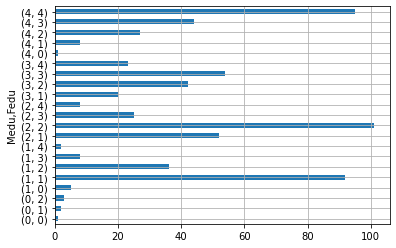

In [14]:
df.groupby(['Medu', 'Fedu']).size().plot(kind='barh', grid=True)
# Result Is Fantastic All Mother And Father The Most Education Is Same

<AxesSubplot:ylabel='Pstatus,Medu,Fedu'>

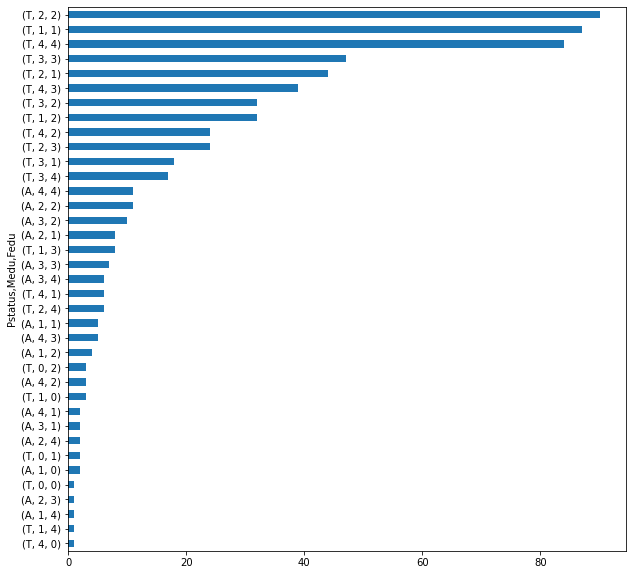

In [15]:
(df.groupby(['Pstatus', 'Medu', 'Fedu']).size()).sort_values().plot(kind='barh', figsize=(10, 10))

In [16]:
df['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

In [17]:
df['Fjob'].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

<AxesSubplot:ylabel='Pstatus,Fjob,Mjob'>

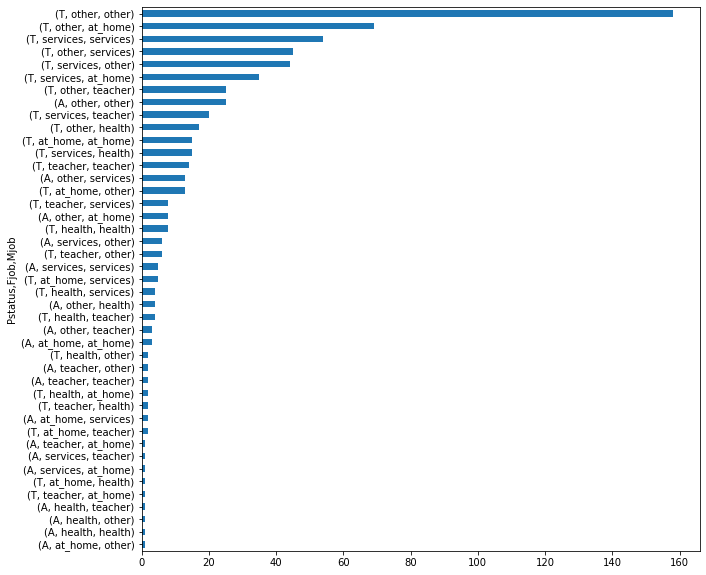

In [18]:
(df.groupby(['Pstatus', 'Fjob', 'Mjob']).size()).sort_values().plot(kind='barh', figsize=(10, 10))

In [19]:
print("""
    close to 'home', 
    school 'reputation',
    'course' preference,
    'other'
""")
df['reason'].value_counts()


    close to 'home', 
    school 'reputation',
    'course' preference,
    'other'



course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

<AxesSubplot:ylabel='address,reason'>

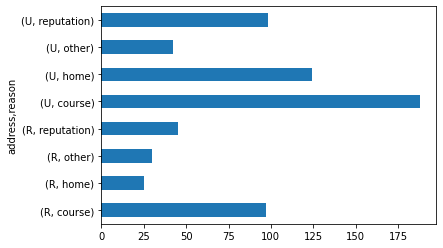

In [20]:
df.groupby(['address', 'reason']).size().plot(kind='barh')

In [21]:
df.iloc[:, 10:]

,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,higher,internet,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,mother,2,2,0,yes,no,no,no,yes,no,...,4,3,4,1,1,3,4,0,11,11
1,father,1,2,0,no,yes,no,no,yes,yes,...,5,3,3,1,1,3,2,9,11,11
2,mother,1,2,0,yes,no,no,no,yes,yes,...,4,3,2,2,3,3,6,12,13,12
3,mother,1,3,0,no,yes,no,yes,yes,yes,...,3,2,2,1,1,5,0,14,14,14
4,father,1,2,0,no,yes,no,no,yes,no,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,mother,1,3,1,no,no,no,yes,yes,yes,...,5,4,2,1,2,5,4,10,11,10
645,mother,1,2,0,no,yes,no,no,yes,yes,...,4,3,4,1,1,1,4,15,15,16
646,mother,2,2,0,no,no,no,yes,yes,no,...,1,1,1,1,1,5,6,11,12,9
647,mother,2,1,0,no,no,no,no,yes,yes,...,2,4,5,3,4,2,6,10,10,10


In [22]:
print("""
      guardian_status: 
      mother,
      father,
      other
      """)
df['guardian'].value_counts()


      guardian_status: 
      mother,
      father,
      other
      


mother    455
father    153
other      41
Name: guardian, dtype: int64

In [23]:
df['traveltime'].value_counts()

1    366
2    213
3     54
4     16
Name: traveltime, dtype: int64

In [24]:
df['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

In [25]:
# failures - number of past class failures (numeric: n if 1<= n <3, else 4
df['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

In [26]:
df['schoolsup'].value_counts()

no     581
yes     68
Name: schoolsup, dtype: int64

In [27]:
df['famsup'].value_counts()

yes    398
no     251
Name: famsup, dtype: int64

<AxesSubplot:ylabel='Fjob,Mjob,famsup'>

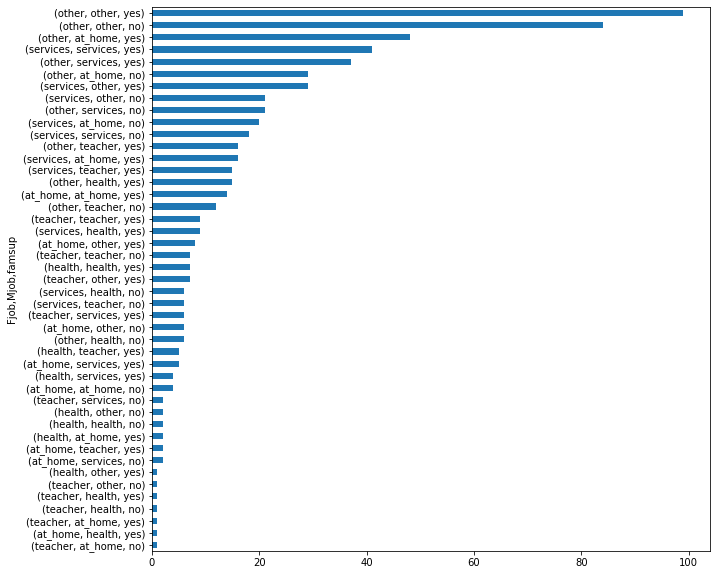

In [28]:
(df.groupby(['Fjob', 'Mjob', 'famsup']).size()).sort_values().plot(kind='barh', figsize=(10, 10))

<AxesSubplot:ylabel='Fedu,Medu,famsup'>

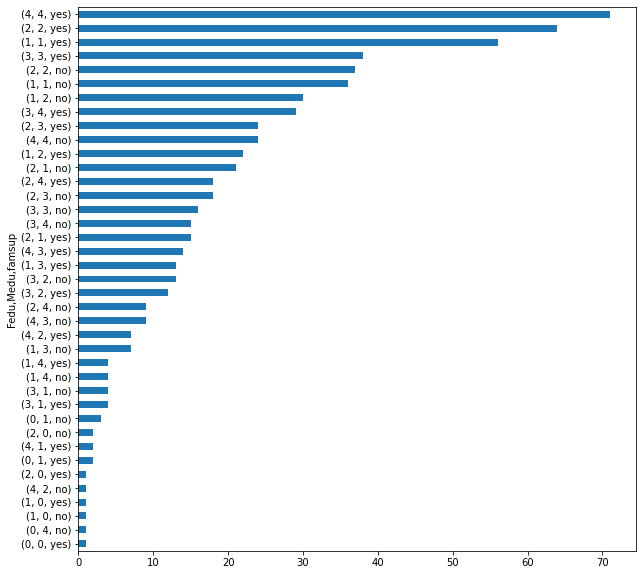

In [29]:
(df.groupby(['Fedu', 'Medu', 'famsup']).size()).sort_values().plot(kind='barh', figsize=(10, 10))

In [30]:
df['paid'].value_counts()

no     610
yes     39
Name: paid, dtype: int64

In [31]:
df['activities'].value_counts()

no     334
yes    315
Name: activities, dtype: int64

In [32]:
df['higher'].value_counts()

yes    580
no      69
Name: higher, dtype: int64

<AxesSubplot:ylabel='None'>

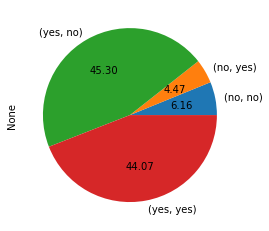

In [33]:
df.groupby(['higher', 'activities']).size().plot(kind='pie', autopct='%1.2f')

In [34]:
df.iloc[:, 20:]

,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,no,4,3,4,1,1,3,4,0,11,11
1,no,5,3,3,1,1,3,2,9,11,11
2,no,4,3,2,2,3,3,6,12,13,12
3,yes,3,2,2,1,1,5,0,14,14,14
4,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...
644,no,5,4,2,1,2,5,4,10,11,10
645,no,4,3,4,1,1,1,4,15,15,16
646,no,1,1,1,1,1,5,6,11,12,9
647,no,2,4,5,3,4,2,6,10,10,10


#### famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)¶
#### freetime - free time after school (numeric: from 1 - very low to 5 - very high)
#### goout - going out with friends (numeric: from 1 - very low to 5 - very high)
#### Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
#### Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
#### health - current health status (numeric: from 1 - very bad to 5 - very good)
#### absences - number of school absences (numeric: from 0 to 93)

<AxesSubplot:ylabel='internet,higher'>

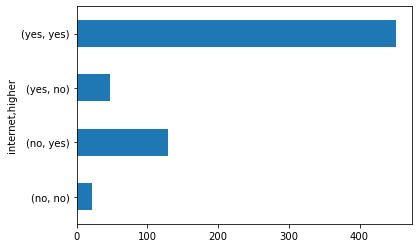

In [35]:
df.groupby(['internet', 'higher']).size().plot(kind='barh')

<AxesSubplot:ylabel='internet,higher,romantic,health'>

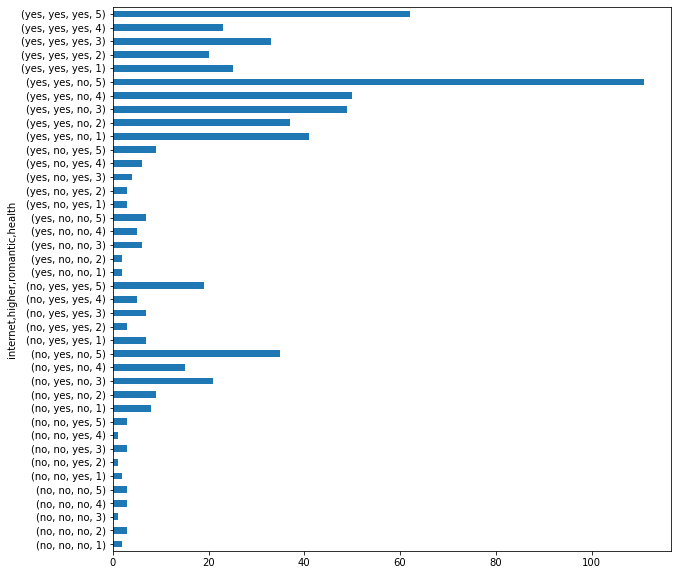

In [36]:
df.groupby(['internet', 'higher', 'romantic', 'health']).size().plot(kind='barh', figsize=(10,10))

In [37]:
#df.groupby(['internet', 'Dalc', 'romantic', 'health', 'age']).size().sort_values().plot(kind='barh', figsize=(10,40))

In [38]:
#df.groupby(['absences', 'higher']).size()

In [39]:
df.iloc[:,-5:]

,health,absences,G1,G2,G3
0,3,4,0,11,11
1,3,2,9,11,11
2,3,6,12,13,12
3,5,0,14,14,14
4,5,0,11,13,13
...,...,...,...,...,...
644,5,4,10,11,10
645,1,4,15,15,16
646,5,6,11,12,9
647,2,6,10,10,10


In [40]:
df['total'] = (df['G1'] + df['G2'] + df['G3']) // 3

In [41]:
above_mean = df[df['total'] >= 11]

<AxesSubplot:ylabel='Medu,Fedu,internet,higher'>

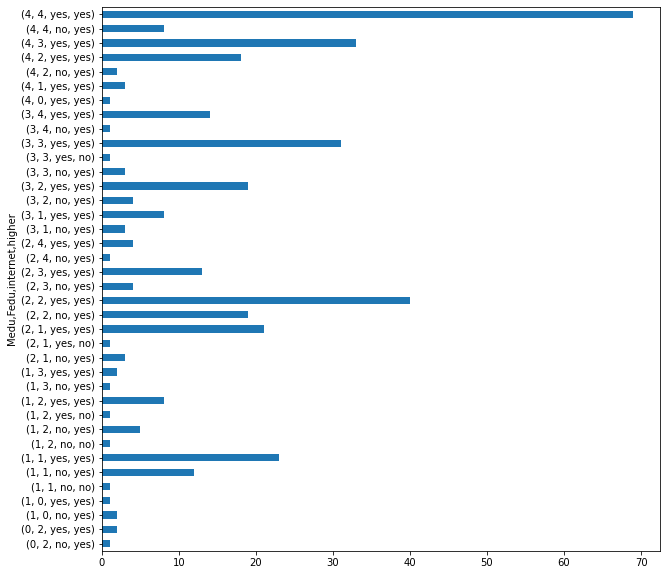

In [42]:
above_mean.groupby(['Medu', 'Fedu', 'internet', 'higher']).size().plot(kind='barh', figsize=(10,10))

In [43]:
df.drop(['G1', 'G2', 'G3', 'famsize', 'guardian'], axis='columns', inplace=True)

In [44]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x

,sex,age,address,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,F,18,U,A,4,4,at_home,teacher,course,2,...,yes,no,no,4,3,4,1,1,3,4
1,F,17,U,T,1,1,at_home,other,course,1,...,yes,yes,no,5,3,3,1,1,3,2
2,F,15,U,T,1,1,at_home,other,other,1,...,yes,yes,no,4,3,2,2,3,3,6
3,F,15,U,T,4,2,health,services,home,1,...,yes,yes,yes,3,2,2,1,1,5,0
4,F,16,U,T,3,3,other,other,home,1,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,T,2,3,services,other,course,1,...,yes,yes,no,5,4,2,1,2,5,4
645,F,18,U,T,3,1,teacher,services,course,1,...,yes,yes,no,4,3,4,1,1,1,4
646,F,18,U,T,1,1,other,other,course,2,...,yes,no,no,1,1,1,1,1,5,6
647,M,17,U,T,3,1,services,services,course,2,...,yes,yes,no,2,4,5,3,4,2,6


In [46]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

### Convert Categorical To Number:
#### We Use make_column_transformer, pipeline

In [75]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder

#### We Just Selcet The Columns That Has Categorical And Then compute fit_transform on it

In [51]:
le = LabelEncoder()

In [72]:
objList = df.select_dtypes(include = "object").columns
for column in objList:
    x[column] = le.fit_transform(x[column].astype(str))

## Now Let's Feature Selection:

#### Filter Method:
* select all feature and selecet best subset gothrough to machine 

#### Wrapper Method:
* __Forward__: means add feature and train model if some feature not improvment not add  to feature
* __Backward__: means we select all feature and then delete one by one and train model
*  __Recursive Feature elimination__: It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

## Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.



In [79]:
from sklearn.feature_selection import SelectKBest, chi2

In [80]:
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [81]:
fit = bestfeatures.fit(x, y)

In [82]:
score = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(x.columns)
featureScores = pd.concat([columns,score],axis=1)
featureScores.columns = ['columns','Score']

In [83]:
#columns = pd.DataFrame(x.columns)

In [86]:
#featureScores = pd.concat([columns,score],axis=1)
#featureScores.columns = ['columns','Score']

In [104]:
featureScores.nlargest(10, 'Score')['columns'].values

array(['failures', 'absences', 'reason', 'Medu', 'Mjob', 'Walc', 'Dalc',
       'schoolsup', 'Fedu', 'studytime'], dtype=object)

In [128]:
['failures', 'absences', 'reason', 'Medu', 'Mjob', 'Walc', 'Dalc',
           'schoolsup', 'Fedu', 'studytime']

['failures',
 'absences',
 'reason',
 'Medu',
 'Mjob',
 'Walc',
 'Dalc',
 'schoolsup',
 'Fedu',
 'studytime']

In [130]:
x = x.loc[:, ['failures', 'absences', 'reason', 'Medu', 'Mjob', 'Walc', 'Dalc',
           'schoolsup', 'Fedu', 'studytime']]

#### convert to train_test_split:

In [146]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [178]:
model = linear.fit(x_train, y_train)

In [179]:
y_predict = model.predict(x_test)

In [180]:
model.score(x_train, y_train)

0.2980185222784435

In [181]:
from sklearn.tree import DecisionTreeRegressor

In [206]:
model_tree = DecisionTreeRegressor(max_depth=20)

In [207]:
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=20)

In [208]:
y_predict_d = model.predict(x_test)

In [209]:
model_tree.score(x_train, y_train)

0.9910716680105052